<a href="https://colab.research.google.com/github/caramos84/Quantum/blob/main/KochStructure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Fractales: Estructuras de Koch
# Carlos Ramos + ChatGPT o1
# 29/03/2025

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def koch_snowflake(order, scale=1):
    """
    Generate the Koch snowflake fractal using a recursive function.
    """
    def generate_koch_curve(p1, p2, depth):
        if depth == 0:
            return [p1, p2]

        p1 = np.array(p1)
        p2 = np.array(p2)
        delta = (p2 - p1) / 3

        # Calculate new points
        pA = p1 + delta
        pB = p2 - delta
        pC = pA + np.array([delta[0] * np.cos(np.pi/3) - delta[1] * np.sin(np.pi/3),
                            delta[0] * np.sin(np.pi/3) + delta[1] * np.cos(np.pi/3)])

        return (generate_koch_curve(p1, pA, depth-1) +
                generate_koch_curve(pA, pC, depth-1) +
                generate_koch_curve(pC, pB, depth-1) +
                generate_koch_curve(pB, p2, depth-1))

    # Create an equilateral triangle
    p1 = np.array([0, 0])
    p2 = np.array([scale, 0])
    p3 = np.array([scale/2, scale * np.sin(np.pi/3)])

    # Generate fractal edges
    edge1 = generate_koch_curve(p1, p2, order)
    edge2 = generate_koch_curve(p2, p3, order)
    edge3 = generate_koch_curve(p3, p1, order)

    return edge1 + edge2 + edge3

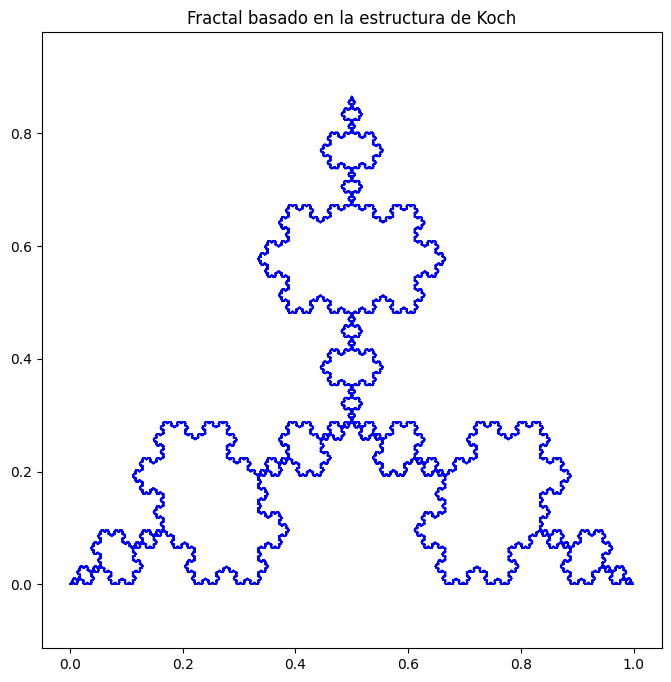

In [10]:
# Define fractal parameters
order = 8  # Number of iterations
points = koch_snowflake(order)

# Convert to numpy array for plotting
x_vals, y_vals = zip(*points)

# Plot
plt.figure(figsize=(8, 8))
plt.plot(x_vals, y_vals, 'b-', linewidth=1)
plt.axis("equal")
plt.title("Fractal basado en la estructura de Koch")
plt.show()